# Face Detector
This is a simple face detector that serves as an introduction to OpenCV and deep learning. This program is intended to serve as a reference, but also a benchmark for the PYNQ board. 

References: [PyImageSearch](https://www.pyimagesearch.com)

## Face Detection Preparations  
#### Function  
1. Loads model architecture and its weights  
2. Converts an image into a blob. This conforms the image to something the nn is designed to analyze.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

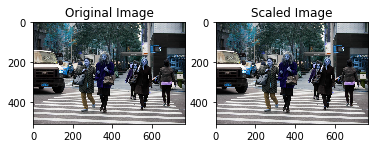

In [5]:
# Load model architecture(prototext) 
# and architecture weights (caffemodel)
nn = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", 
    "res10_300x300_ssd_iter_140000.caffemodel")

# Load image
img = cv2.imread("test.jpg")
fig, ax = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

# Resize Image in prep for blobbige
(h,w) = img.shape[:2] # Returns the original h,w

#Blob Parameters and blobige
scalefactor = 1.0
size = img.shape[:2]
mean_subtraction = (104.0, 177.0,123.0)
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300,300)), scalefactor, 
                             (1000,1000), mean_subtraction)

# Display resized image
plt.subplot(1,2,2)
plt.title("Scaled Image")
plt.imshow(img)

# Face Detection

Number of results    =  200


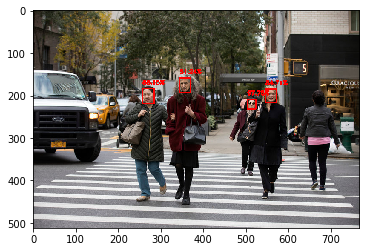

In [6]:
#Passes the img through the nn
nn.setInput(blob)      # Sets the input
results = nn.forward() # Pushes the input through

# Analyzes the results
print("Number of results    = ", results.shape[2])


#Locating and representing the results
for i in range(0,results.shape[2]):
    confidence = results[0,0,i,2];
    
    # Draws boxes if > % chance
    if confidence > 0.30:
        box = results[0,0,i,3:7] * np.array( [w,h,w,h] )
        (x_start, y_start, x_end, y_end) = box.astype("int")
        
        text = "{:.2f}%".format(confidence * 100)
        y = y_start - 10 if y_start - 10 > 10 else y_start + 10
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end),
            (0, 0, 255), 2)
        cv2.putText(img, text, (x_start, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [93]:
help(img.shape)

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<